### Exploratory Data Analysis (EDA):
According to Sahoo *et al*. (2019, p.4727), Exploratory Data Analysis can describe the data sets, such as several rows/columns, missing data, data types, and so on, inclusively cleaning corrupted data. Besides that, measures of mean, mode, median, standard deviation, variance, distribution and the existence of outliers are essential aspects of the EDA. (Sahoo *et al*., 2019, p.4727; Sagala and Aryatama, 2022, p.579)

Exploratory Data Analysis is helpful to increase the understanding of the dataset because it analyses and summarize the main characteristics of the dataset and also by using data visualization such as Histograms, Box plot, Scatter plots and others (Sagala and Aryatama, 2022, p.579).


### Characterisation of the dataset:
Data Characterization is part of Exploratory Data Analysis (EDA); it describes the data and can be referenced as metadata ("data about data"), which is the data characteristics, for example, data type, size, distribution and pattern. (Panzner *et al*., 2022, p.7) The purpose of the data characterization is to examine and understand the fundamental characteristics and properties of a dataset to gain insights about the data.

This dataset contains 60,000 observations, 170 numerical features and 1 categorical feature. This feature is presented with ‘pos’ when the failure in components is related to a specific APS system, and 'neg' when this failure is not associated with the APS system. 
I also found that the dataset contains more than 99% of the missing values; consequently, instead of removing them, I had to input them with a median or interpolation because the dataset was skewed. For the first time, I used the median, but some variables showed values so far from the original dataset, and because of this, I used the interpolation values.
The dataset is highly imbalanced or skewed because approximately 98% are represented in the 'neg' class, while 2% are in the 'pos' class. This can be a problem when applying machine learning models because it will likely produce biased predictions. 

### Curse of Dimensionality:
I would say that the Curse of Dimensionality is a dilemma, because it is always important to have more data to improve the accuracy of a model. However,  when we increase the number of features, we are increasing the number of dimensions and decreasing the number of observations. 
This lead to another problem, which is the need for more understanding and explicability because when the dataset has too many dimension (features), it isn't easy to understand what the data is trying to say. 
To deal with this problem, we have the Principal Component Analysis (PCA), a method to reduce the dimension of the data, maintaining its pattern.



To start the EDA, I will import all the libraries I will use, such as Pandas, for functions and methods to manipulate the data in this library and Numpy to solve mathematical problems.

In [2]:
%matplotlib inline
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

I used the 'pd.read_csv' method to access the file that I want to work with.

In [3]:
df = pd.read_csv("aps_failure_set.csv")

I used the 'head' method to view the file.

In [4]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


I used the method df.shape to have an idea of the dataset size. And I found that this dataset has 60000 rows and 171 columns.

In [5]:
df.shape

(60000, 171)

With the describe() method, I can see that this dataset is skewed by comparing the values of mean and median (50% value). Thus, I will start the cleaning process but take care not to distort the data. 

In [6]:
df.describe()

,aa_000
count,6.000000e+04
mean,5.933650e+04
std,1.454301e+05
min,0.000000e+00
25%,8.340000e+02
50%,3.077600e+04
75%,4.866800e+04
max,2.746564e+06


### Cleaning the dataset

The method df.info() gave me an idea about the values inside the dataset.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


After run the df.info() method I realized that the dataset has 170 features denominated as object which means that in this feature there are values that are string or sinalized as 'NaN' by the programm for unkown values.

I used the unique() method to obtain all kind of data that there is inside de column "class". As a result is showed that I have strings in this column with two types: 'neg' and 'pos'. 

In [8]:
df["class"].unique()

array(['neg', 'pos'], dtype=object)

The method miss_val_formats call a list of strings that have some possible formats that might be used to indicate missing or invalid data in the dataset. Then the code below will search on the entire dataset for all the data that are in the list 'miss_val_formats' which may represent missing or invalid data and place them with 'NaN', which means not a number.

In [9]:
miss_val_formats = ["n.a.", "?", "NA", "n/a", "na", "--"]

In [10]:
df = pd.read_csv("aps_failure_set.csv", na_values=miss_val_formats)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 78.3+ MB


In [12]:
df.dtypes

class      object
aa_000      int64
ab_000    float64
ac_000    float64
ad_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 171, dtype: object

After run the method info() again I saw that the data types has changed. There are float, integer, and object (string), because probably there was missing or invalid data that was changing columns with float values in string columns.

Now I am using the code df.isnull().sum() to calculate the numbers of missing (null and NaN) values in all columns of the dataset. As result I found that there a lot of missing values, for example in the column ab_000 there are 46329 records missing (null and NaN). 
Considering that this dataset has a huge amount of missing values I will not allowed to use the code df.dropna(axis=0) because if I do it I will lose the confiability on the information that this dataset might have.
Just for instance if I follow this pathway I will get a dataset with only 591 rows, which means that I would lose more than 99% of the dataset.

In [13]:
df.isnull().sum()

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

In [14]:
new_df = df.dropna(axis=0)

In [15]:
new_df.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In [16]:
new_df.shape

(591, 171)

Above is shown that after proceeding that pathway I ended up with only 591 records (rows). In this case I wil use another solution to replace those missing values.

When I repeated the process above, I saw that instead of the dataset having 171 columns, it became only 2 columns, meaning that 169 were deleted from the dataset.

In [17]:
df.shape

(60000, 171)

In [18]:
new_df = df.dropna(axis=1)

In [19]:
new_df.shape

(60000, 2)

Now I will again access the original dataframe (df) and apply the fillna method to replace all missing data.

In [20]:
df.shape

(60000, 171)

### Inputing data with median values

According to df.describe(), we can see that the data is skewed. Therefore, it is recommended to use the **median** to replace missing values, as it provides a better representation of the majority of the variable's values. In contrast, the mean is influenced by values at the extreme of the distribution.

I opted not to use the "warnings.filterwarnings" to suppress alerts because some can be useful during my analysis.

In [21]:
df2 = df.fillna(df.median())

C:\Users\danie\AppData\Local\Temp\ipykernel_15516\2636348673.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2 = df.fillna(df.median())


In [22]:
df2.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [23]:
df2.shape

(60000, 171)

In [24]:
df2.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In [25]:
df2.shape

(60000, 171)

In [26]:
df2.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,60000.000000,6.000000e+04,6.000000e+04,60000.000000,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,...,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,60000.000000
mean,5.933650e+04,0.162500,3.362258e+08,1.434383e+05,6.535000,10.548200,2.191577e+02,9.648104e+02,8.509771e+03,8.760054e+04,...,4.431223e+05,2.100188e+05,4.432268e+05,3.916653e+05,3.303672e+05,3.428586e+05,1.372212e+05,8.295099e+03,0.086467,0.203100
std,1.454301e+05,1.687318,7.767625e+08,3.504525e+07,158.147893,205.387115,2.036364e+04,3.400891e+04,1.494818e+05,7.575171e+05,...,1.149276e+06,5.403725e+05,1.162002e+06,1.114964e+06,1.063465e+06,1.718666e+06,4.472145e+05,4.721249e+04,4.268570,8.628043
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,0.000000,2.000000e+01,4.200000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.033500e+03,1.204000e+03,2.848500e+03,3.839000e+03,5.600000e+02,1.180000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,0.000000,8.480000e+02,2.920000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.350315e+05,2.164440e+05,4.624655e+05,4.003010e+05,2.725220e+05,1.663465e+05,1.367255e+05,1.934000e+03,0.000000,0.000000
max,2.746564e+06,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


In [27]:
df2.shape

(60000, 171)

### Inputing data with interpolation values

After replacing the missing values with the median of each variable, there were no more null or missing values, but the variables remained skewed.
However, variables like 'ab_000' and 'ef_000' have shown values so far from the original dataset, meaning that the input with median was less effective than I imagined.  
In this case, it will be necessary to use **Interpolation**, which performs linear Interpolation on missing data points.

In [28]:
df.shape

(60000, 171)

In [29]:
df3 = df.interpolate(method="linear", direction="forward")

In [30]:
df3.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,59997.000000,6.000000e+04,6.000000e+04,60000.000000,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,...,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,60000.000000
mean,5.933650e+04,0.701035,3.565030e+08,1.435263e+05,6.886533,11.100517,2.203502e+02,9.691852e+02,8.571722e+03,8.844413e+04,...,4.453309e+05,2.110075e+05,4.454135e+05,3.935807e+05,3.327470e+05,3.455027e+05,1.386618e+05,8.386621e+03,0.090400,0.211217
std,1.454301e+05,2.650264,7.837943e+08,3.504525e+07,160.644593,208.515341,2.036531e+04,3.401127e+04,1.495479e+05,7.589686e+05,...,1.152805e+06,5.421643e+05,1.164657e+06,1.116694e+06,1.065782e+06,1.720842e+06,4.487702e+05,4.736593e+04,4.321733,8.660519
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,0.000000,1.800000e+01,3.200000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.992000e+03,1.192000e+03,2.790000e+03,3.751500e+03,5.420000e+02,1.160000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,0.000000,1.620000e+02,1.500000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.341870e+05,1.122220e+05,2.219390e+05,1.906900e+05,9.407350e+04,4.185700e+04,4.129000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,0.800000,1.042000e+03,4.460000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.386280e+05,2.183070e+05,4.666820e+05,4.031165e+05,2.749965e+05,1.676955e+05,1.397620e+05,2.062500e+03,0.000000,0.000000
max,2.746564e+06,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


In [31]:
df3.isnull().sum()

class     0
aa_000    0
ab_000    3
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

When I compare the descriptive parameters between the original dataset (df) and the dataset with interpolation values (df3), I see that these parameters are still similar, but with the advantage that the missing values are only present in a few rows.
Now, I will drop these values without losing the meaning of the dataset.
Below, you can see that I only removed 13 rows, less than 0.1% of the total amount of the dataset, which is insignificant.

In [32]:
df4 = df3.dropna(axis=0)

In [33]:
df4.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In [34]:
df4.shape

(59987, 171)

I will use the duplicated() method to eliminate records that may be duplicated. However in this dataset there is no duplicates as we can see below.

In [35]:
df4.duplicated().sum()

0

I used the value_counts() method to find out how many observations we have in each of these classes, positive and negative.
As we can see, we have 999 records for positive class, meaning that occurrences are related to a failure in components specifics of the APS system. In contrast, the remainder, 58988 records (negative), means that the truck's failure in components is unrelated to the APS system. In other words, approximately 98% of the component failures are not due to the APS system.

In [36]:
df4["class"].value_counts()

neg    58988
pos      999
Name: class, dtype: int64

I will import the Seaborn data visualization library to make the histogram; thus, that difference will be more evident.

<Axes: xlabel='class', ylabel='Count'>

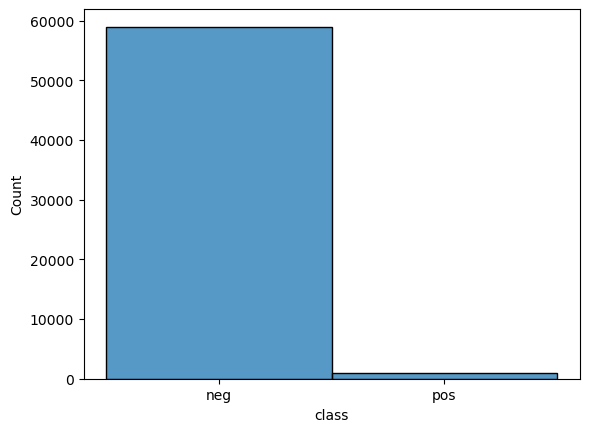

In [37]:
sns.histplot(data=df4, x="class")

### Focusing on Positive class

Considering that the company wants to know about the specific component failures related to the APS system, I need to focus the analysis in this class ('pos'), which is around 2% of the total dataset.
To proceed, I will create a subset of the dataset (df4) that only contains data of the positive class.
Below, the methods "shape and unique" certify that the subset contains exclusively the positive class.

In [38]:
by_category = df4.groupby('class')
subset = by_category.get_group('pos')
print(subset)

      class   aa_000    ab_000        ac_000       ad_000  ae_000  af_000  \
23      pos   453236  0.000000  2.926000e+03  1420.000000     0.0     0.0   
60      pos    72504  0.000000  1.594000e+03  1052.000000     0.0     0.0   
115     pos   762958  0.000000  1.065353e+09    98.000000     0.0     0.0   
135     pos   695994  1.000000  1.300000e+01    12.000000     0.0     0.0   
156     pos  1056758  0.000000  4.232800e+04   856.000000     0.0     0.0   
...     ...      ...       ...           ...          ...     ...     ...   
59484   pos   895178  0.000000  1.065353e+09    19.000000     0.0     0.0   
59601   pos   862134  3.384615  1.840000e+02   420.000000     0.0     0.0   
59692   pos   186856  0.000000  1.065353e+09   982.666667     0.0     0.0   
59742   pos   605092  1.818182  1.420471e+09    28.666667     0.0     0.0   
59769   pos   331704  0.000000  1.484000e+03  1142.000000     0.0     0.0   

       ag_000    ag_001     ag_002  ...     ee_002     ee_003     ee_004  \

Using the code below, the 'pos' class will be represented by the number 1. It is important because PCA and machine learning models handle numbers; otherwise, this feature will not be recognised. 

In [39]:
subset['class'].replace('pos', 1, inplace = True)
print(subset['class'])

23       1
60       1
115      1
135      1
156      1
        ..
59484    1
59601    1
59692    1
59742    1
59769    1
Name: class, Length: 999, dtype: int64


C:\Users\danie\AppData\Local\Temp\ipykernel_15516\2464997387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['class'].replace('pos', 1, inplace = True)


In [40]:
subset.shape

(999, 171)

In [41]:
subset.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
23,1,453236,0.0,2.926000e+03,1420.0,0.0,0.0,0.0,0.0,222.0,...,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
60,1,72504,0.0,1.594000e+03,1052.0,0.0,0.0,0.0,244.0,178226.0,...,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0,0.0,0.0
115,1,762958,0.0,1.065353e+09,98.0,0.0,0.0,776.0,281128.0,2186308.0,...,179282.0,85194.0,192889.0,209641.0,115781.0,63662.0,86572.0,7663.0,0.0,0.0
135,1,695994,1.0,1.300000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1397742.0,495544.0,361646.0,28610.0,5130.0,212.0,0.0,0.0,0.0,0.0
156,1,1056758,0.0,4.232800e+04,856.0,0.0,0.0,0.0,50394.0,184552.0,...,1450086.0,713608.0,1750894.0,4054554.0,4096660.0,2295880.0,220478.0,482.0,0.0,0.0


In [42]:
subset["class"].unique()

array([1], dtype=int64)

In [43]:
subset["class"].unique()

array([1], dtype=int64)

### Checking for outliers

As I saw previously, this subset is skewed; thus, there is the possibility that there are many outliers. To check it, I will calculate the Interquartile Range (IQR) using the first and third-quartile values. Then, I will use the boxplot graphic to visualize some features, and finally, I will identify and remove the outliers if it does not affect the integrity of the dataset.

In [44]:
Q1 = subset.quantile(0.25)
Q3 = subset.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

class     0.000000e+00
aa_000    6.105250e+05
ab_000    1.000000e+00
ac_000    3.246000e+03
ad_000    6.947667e+02
              ...     
ee_007    2.951291e+06
ee_008    4.683840e+05
ee_009    1.968000e+03
ef_000    0.000000e+00
eg_000    0.000000e+00
Length: 171, dtype: float64


Boxplot graphics represent the data concentration, such as central tendency, symmetry, skew and outlier. (Sahoo et al., 2019, p.4728).
Below are three boxplot graphics to illustrate the outliers in some features.

<Axes: xlabel='aa_000'>

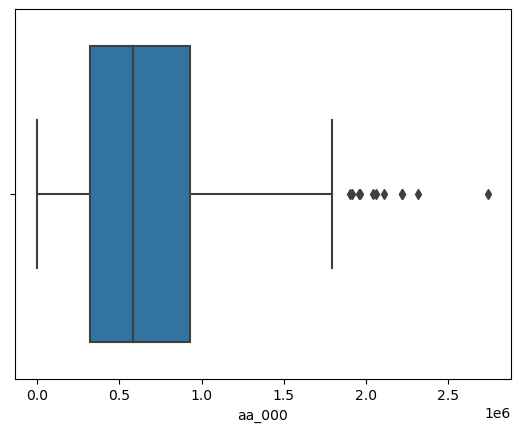

In [45]:
sns.boxplot(x=subset['aa_000'])

<Axes: xlabel='ab_000'>

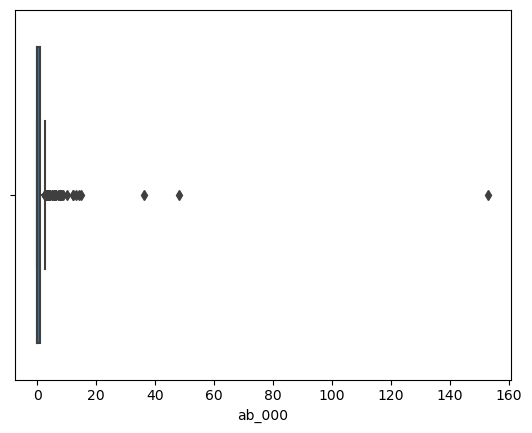

In [46]:
sns.boxplot(x=subset['ab_000'])

<Axes: xlabel='ac_000'>

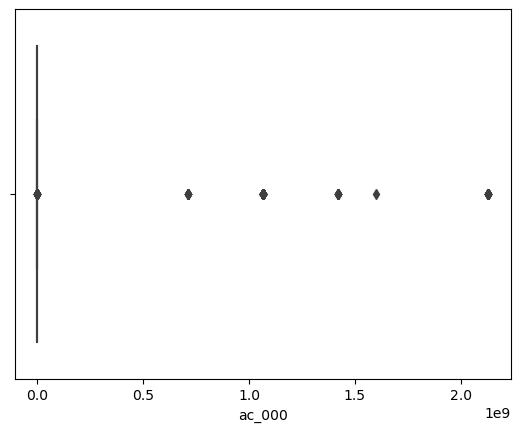

In [47]:
sns.boxplot(x=subset['ac_000'])

The function below is used to identify and remove the outliers based on the interquartile range.
When I used the method shape(), I realized that this procedure of removing the outliers would delete almost 100% of the data rows, thus making it impracticable. Therefore I will not remove the outliers from this dataset and I will find out other alternative to preserve the integrity of the dataset and the analysis.

In [48]:
df_outliers = subset[~((subset<(Q1-1.5*IQR))|(subset>Q3+1.5*IQR)).any(axis=1)]
df_outliers.shape

(8, 171)

# GRAPHICS

### Calculating the sparsity of the dataset

Sparsity is a measurement of how sparse or dense a dataset is. It can be represented as the ratio of the number of zero or missing values to the total number of data points or entries in the dataset. Below we can see 

In [49]:
missing_values = subset.isnull().sum().sum()
zero_values = (subset == 0).sum().sum()

total_data_points = subset.size

sparsity = (missing_values + zero_values) / total_data_points

print(f"Sparsity of the dataset: {sparsity:.3f}")

Sparsity of the dataset: 0.273


The sparsity values must be between 0 and 1 when 0 indicates no sparsity, and 1 indicates completely spaced. The result for this dataset was found to be 0.27, meaning that 27% of the dataset is sparse and has a significant portion of missing or zero values. As I input the missing values with interpolation values, I can rationalise that the zero values alone might contribute to the sparsity.

#### Extracting the dependent variable from the independent variables

I used the code below to separate dependent variable ('class') signed as y that is the 'target variable', from the idependent variables signed as X.
It is necessary because the data transformation method and PCA handle only numeric data.(Lindgren, 2020, p.1)

In [132]:
X = subset.drop(columns=["class"])
y = subset["class"]

### Data Transformation

When the data is under a systematic source of variation, it is necessary to transform it into a scale suitable for analysis. (Muralidharan, 2010, p.1) There are some options to carry out the data transformation, such as normalization, min-max scaling and standardization. Considering that some models and classifiers use the Euclidean Distance to calculate the distance between two points, it is reasonable to think that this calculus will be different between all the features, and it may introduce bias if the data is not normalized.(Borkin et al., 2019, p.82)

Principal Component Analysis (PCA) is sensitive to the scale of the data, and because of this, it is highly recommended to standardize or normalize the data before applying PCA.(Müller and Guido, 2017 p.144). 
Müller and Guido (2017 p.133) explain that the RobustScale is another way to transform data considering median and quartiles. They also argue that this method is indicated for the dataset that includes outliers, and extreme values and is skewed.  
Taking all this into consideration and rationalising that the present dataset is skewed, there are extreme values and outliers. I decided to use the RobustScale method to transform the dataset. 

Before starting this procedure, I need to drop the 'class' column because the RobustScaler was designed to handle numeric data. Although a number represents the feature class, it is a dependent variable, and for PCA, we can only include independent variables.

subset_no_class = subset.drop(['class'], axis = 1)
subset_no_class.shape

In [133]:
from sklearn.preprocessing import RobustScaler
data = np.array(X)
scaler = RobustScaler()
scaled_data = scaler.fit_transform(X)

In [134]:
print(scaled_data)

[[-2.15810982e-01  0.00000000e+00  7.15650031e-01 ...  3.50914634e+00
   0.00000000e+00  0.00000000e+00]
 [-8.39425085e-01  0.00000000e+00  3.05298829e-01 ... -4.06504065e-03
   0.00000000e+00  0.00000000e+00]
 [ 2.91493387e-01  0.00000000e+00  3.28204779e+05 ...  3.88973577e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [-6.52123992e-01  0.00000000e+00  3.28204749e+05 ... -4.06504065e-03
   0.00000000e+00  0.00000000e+00]
 [ 3.29192089e-02  1.81818182e+00  4.37606394e+05 ... -4.06504065e-03
   0.00000000e+00  0.00000000e+00]
 [-4.14872446e-01  0.00000000e+00  2.71410967e-01 ... -4.06504065e-03
   0.00000000e+00  0.00000000e+00]]


In [135]:
scaled_data.shape

(999, 170)

### Applying Principal Componente Analysis (PCA)

PCA is a technique for data compression and feature extraction with wide use in data analysis and pattern recognition. (Xu and Yuille, 1995, p.131)

I will use scaled_data to obtain the number of components needed to retain 99.5% variance in the subset, which considers the component failures related to the APS system exclusively.

To start the PCA analysis I called the PCA instance with 0.995 which is 99.5% variance. Then I fited the PCA model to the data (scaled_data).  

In [136]:
pca = PCA(n_components=0.995).fit(scaled_data)

 The code below calculates the Explained Variance ratio which is the percentage of variance for each component (Lindgren, 2020, p.1).

In [137]:
explained_variance = pca.explained_variance_ratio_

In [138]:
print(explained_variance)

[0.37433731 0.28514534 0.14705747 0.06509921 0.05365721 0.03454178
 0.01871644 0.00682404 0.00666707 0.00324396]


Now, using this code, I can get a graphic that shows me the number of components I need to set in my PCA model to achieve a cumulated explained variance of almost 100% (I have said 'almost' because only looking in the graphic is not possible to be precisely). However, previously, I indicated that I wanted 99.5% variance, and the explained_variance already showed me that I need at least ten components to reduce the dimension of the subset and continue with 99.5% variance. 

Text(0, 0.5, 'cumulated explained variance')

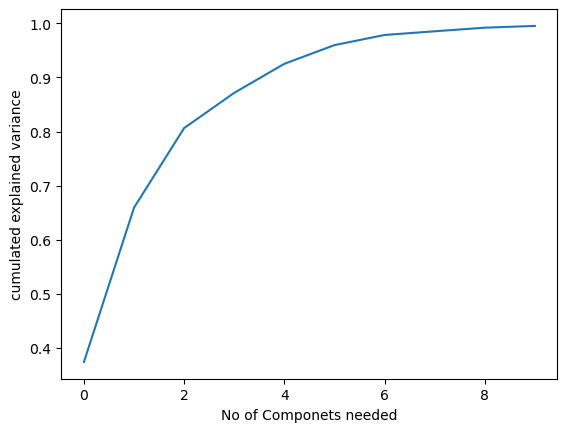

In [139]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("No of Componets needed")
plt.ylabel("cumulated explained variance")

Here, I only inserted the number of components in the PCA model to reduce the dimensions or number of features and continue with the data pattern with 99.5% variance.

In [148]:
num_components = 10
pca = PCA(n_components=num_components)
projected = pca.fit_transform(scaled_data)

In [121]:
projected

array([[ 3.16089461e+06, -3.21542978e+05, -2.05047202e+05, ...,
        -1.87425406e+05,  7.87117734e+05, -7.04290080e+03],
       [-9.65378522e+05,  4.54719910e+05,  1.11640928e+05, ...,
        -2.47087837e+04, -5.48748159e+04, -1.26246878e+04],
       [-9.64929262e+05,  4.55055564e+05,  1.10142340e+05, ...,
        -2.56695130e+04, -5.98332207e+04, -1.39913196e+04],
       ...,
       [ 2.50673050e+07,  3.38690088e+06, -2.06130073e+07, ...,
        -2.54883411e+05,  1.32391769e+06,  8.11791737e+03],
       [-9.65147242e+05,  4.55401750e+05,  1.09734377e+05, ...,
        -2.66218393e+04, -6.26921882e+04,  2.93661207e+04],
       [-9.65384709e+05,  4.54724998e+05,  1.11644352e+05, ...,
        -2.48809212e+04, -5.49147653e+04, -1.26272894e+04]])

In [122]:
scaled_data_pca = pd.DataFrame(projected,columns=["C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "C10"])
scaled_data_pca.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
0,3.160895e+06,-321542.978370,-205047.202279,225692.048543,-131091.194645,-136391.800194,-34747.487907,-187425.405622,787117.734354,-7042.900803
1,-9.653785e+05,454719.909891,111640.928399,-102007.540191,-184012.454203,-179111.430843,-42589.938687,-24708.783728,-54874.815894,-12624.687754
2,-9.649293e+05,455055.564184,110142.340316,-100814.439440,-185126.445564,-180875.487521,-43002.781645,-25669.512970,-59833.220660,-13991.319575
3,6.931542e+05,465661.957296,-981109.900718,-177334.913214,-165941.276500,-160954.474445,-38328.239668,-8554.031353,-117681.436266,-11676.898909
4,-9.653892e+05,454726.616656,111643.945090,-102014.261563,-184020.964227,-179129.747299,-42599.662387,-24729.144759,-54913.852108,-12648.065450


In [127]:
scaled_data_pca["class"] = subset["class"]
scaled_data_pca.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,class
0,3.160895e+06,-321542.978370,-205047.202279,225692.048543,-131091.194645,-136391.800194,-34747.487907,-187425.405622,787117.734354,-7042.900803,NaN
1,-9.653785e+05,454719.909891,111640.928399,-102007.540191,-184012.454203,-179111.430843,-42589.938687,-24708.783728,-54874.815894,-12624.687754,NaN
2,-9.649293e+05,455055.564184,110142.340316,-100814.439440,-185126.445564,-180875.487521,-43002.781645,-25669.512970,-59833.220660,-13991.319575,NaN
3,6.931542e+05,465661.957296,-981109.900718,-177334.913214,-165941.276500,-160954.474445,-38328.239668,-8554.031353,-117681.436266,-11676.898909,NaN
4,-9.653892e+05,454726.616656,111643.945090,-102014.261563,-184020.964227,-179129.747299,-42599.662387,-24729.144759,-54913.852108,-12648.065450,NaN


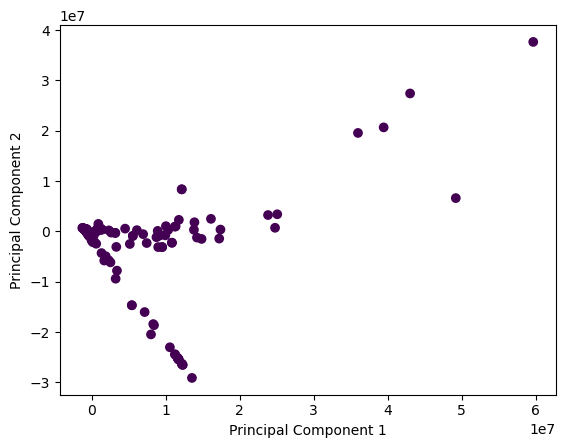

In [162]:
# Example: Create a scatter plot of the first two principal components
plt.scatter(projected[:, 0], projected[:, 1], c=y, cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

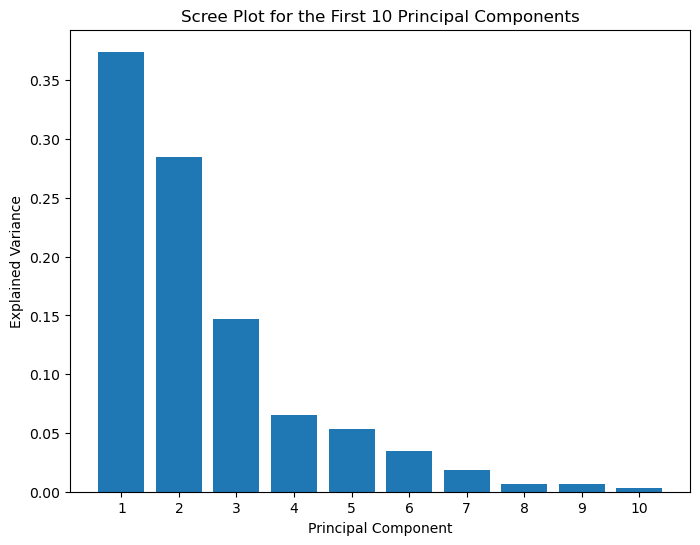

In [163]:
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 6))
plt.bar(range(1, 11), explained_variance[:10], tick_label=range(1, 11))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Scree Plot for the First 10 Principal Components')
plt.show()

### Conclusion:

### References

Melina Panzner et al. (2022) ‘Characterization of Usage Data with the Help of Data Classifications’, *Journal of the Knowledge Economy* [Preprint]. Available at: https://search.ebscohost.com/login.aspx?direct=true&db=edsair&AN=edsair.doi...........8017c54a020b9debf67ec56928155640&site=eds-live&scope=site (Accessed: 25 October 2023).

Noviyanti T M Sagala and Fonggi Yudi Aryatama (2022) ‘Exploratory Data Analysis (EDA): A Study of Olympic Medallist’, *Sistemasi: Jurnal Sistem Informasi*, 11(3), pp. 578–587. doi:10.32520/stmsi.v11i3.1857.

Kabita Sahoo *et al*. (2019) “Exploratory Data Analysis using Python,” *Int. J. Innov. Technol. Explor. Eng.*, vol. 8, no. 12, pp. 4727–4735

K. Muralidharan (2010). A Note on Transformation, Standardization and Normalization. *Social Science Research Network*, 9, pp.116–122.

Borkin Dmitrii *et al*. (2019) Impact of Data Normalization on Classification Model Accuracy. *Research Papers Faculty of Materials Science and Technology Slovak University of Technology*, 27(45), pp.79–84. doi:https://doi.org/10.2478/rput-2019-0029.

Lei Xu and Alan L. Yuille (1995) Robust principal component analysis by self-organizing rules based on statistical physics approach. *IEEE Transactions on Neural Networks*, 6(1), pp.131–143. doi:https://doi.org/10.1109/72.363442.

Andreas C. Müller  and Sarah Guido (2017) 'Chapter 3: Unsupervised Learning and Prepocessing', in Schanafelt, D. (ed.) *Introduction to machine learning with Python: a guide for data scientists*. United States of America: O’reilly Media, pp.131-209.

Isabella Lindgren (2020) Dealing with Highly Dimensional Data using Principal Component Analysis (PCA). Available at: https://towardsdatascience.com/dealing-with-highly-dimensional-data-using-principal-component-analysis-pca-fea1ca817fe6 (Accessed:30 October 2023).